# Supervised_learning_algorithms_Classification

#### - Exercise 1
Create at least two different classification models to try to best predict the classes in the attachment.



#### - Exercise 2
Compare classification models using accuracy, a confidence matrix, and other more advanced metrics.



#### - Exercise 3
Train them using the different parameters they support in order to improve their prediction.



#### - Exercise 4
Compare their performance using traint/test or cross-validation approach.



#### - Exercise 5
Apply some engineering process to improve the results (normalization, standardization, sampling...)



In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy
from scipy import stats
import math

## Dataset information:


#### 1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

#### 2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
#### 3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results using the leave-one-out technique)

   In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

   (2) 
   S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA. 

#### 4. Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

#### 5. Number of Instances

      	class 1 59
	class 2 71
	class 3 48

#### 6. Number of Attributes 
	
	13

#### 7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

#### 8. Missing Attribute Values:

	None

#### 9. Class Distribution: number of instances per class

      	class 1 59
	class 2 71
	class 3 48


In [2]:
df = pd.read_csv('wineData.txt', sep=',', header = None)
df.columns= ['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#datatype check
df.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [4]:
df.info

<bound method DataFrame.info of      Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06            

#### Let explor the variables trough visualization:

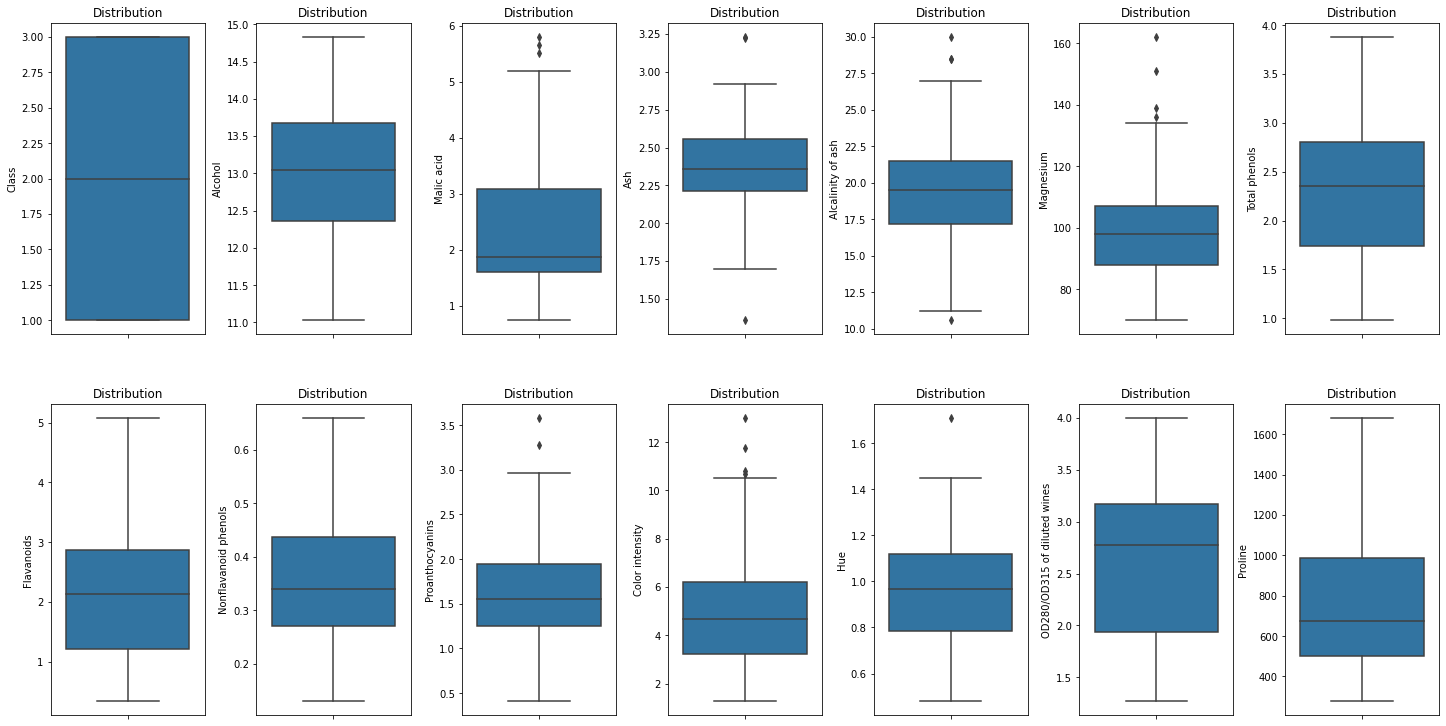

In [5]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index]).set(title='Distribution')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

With this blox plot visualization we can obtain a lot of information about the distribution of the data, see max and min values, and check for outlayers. Values with outlyers: 'Malic Acid', 'Ash', 'Magnesium', ' Ash Alcalinity', ' colour intensity', 'Proanthocyanins', and ' Hue'.

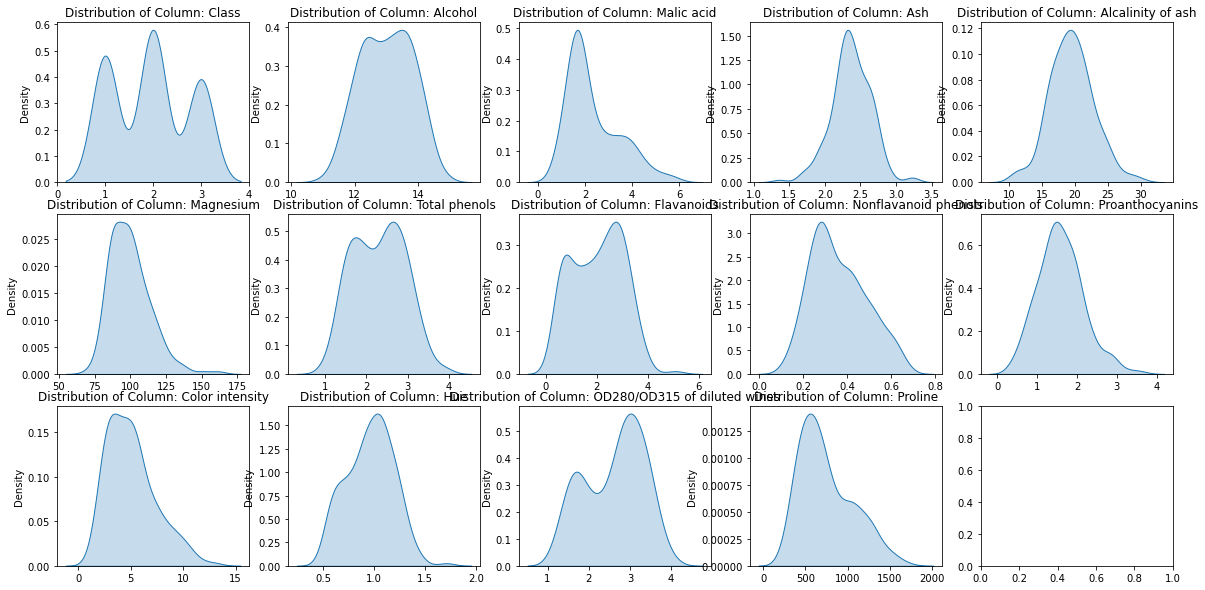

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = ['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] #df.columns[:-1]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = df[[col]]  # select the data
    sns.kdeplot(data=data, x=col, shade=True, ax=ax, palette="rocket" )
    ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
    
plt.show()

We see the distribution of the variable, most of them could seem normally distributed, let explore it with an hypotesis test:

In [7]:
print('Null hypothesis: H0 : P = x -> Normal distribution')
print('Alternative hypothesis Ha : P /= x -> Not normal distribiuted')
print('--------------------------------------------------------')
for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('The variable ', i, "with p-value of ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.03: #Iset the P-value to 0.03 (normally 0.05), for gain more flexibility with the result
        print('Probably normally distributed')
    else:
        print("Probably NOT normally distributed")

Null hypothesis: H0 : P = x -> Normal distribution
Alternative hypothesis Ha : P /= x -> Not normal distribiuted
--------------------------------------------------------
The variable  Class with p-value of  3.526998097335039e-14
Probably NOT normally distributed
The variable  Alcohol with p-value of  0.02005171775817871
Probably NOT normally distributed
The variable  Malic acid with p-value of  2.9459296113643063e-10
Probably NOT normally distributed
The variable  Ash with p-value of  0.03868526220321655
Probably normally distributed
The variable  Alcalinity of ash with p-value of  0.26386943459510803
Probably normally distributed
The variable  Magnesium with p-value of  6.345416068143095e-07
Probably NOT normally distributed
The variable  Total phenols with p-value of  0.004395752213895321
Probably NOT normally distributed
The variable  Flavanoids with p-value of  1.6790636436780915e-05
Probably NOT normally distributed
The variable  Nonflavanoid phenols with p-value of  0.00010552661

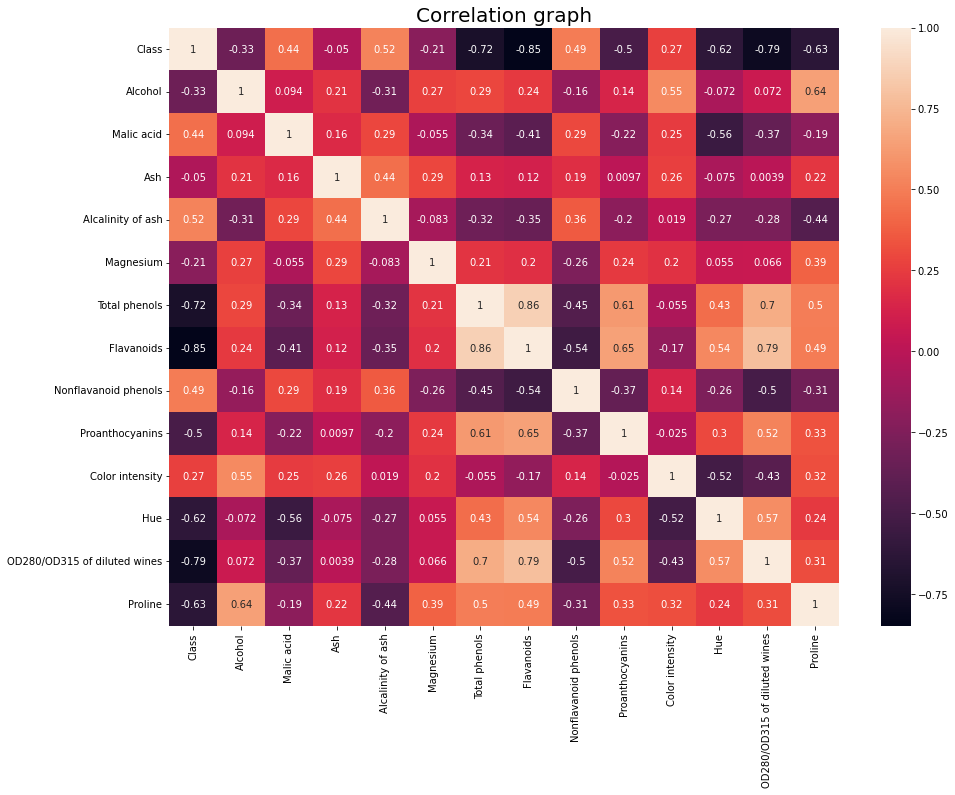

In [8]:
corr = df.corr()
plt.figure(figsize=(15,11))
plt.title('Correlation graph', fontsize=20)
sns.heatmap(corr, annot=True) #annot puts the number of the correlation.
plt.show()

From the correlation graph, we are able to observe the linear correlation between parameters. Based on the above observation, I can see a linear correelation with some variables, and the type of correlation is negative.

## Preprocessing

#### Checking for null values:

In [9]:
df.isnull().values.any()

False

In [10]:
df.isna().values.any()

False

#### Let check the distribution of our variables:

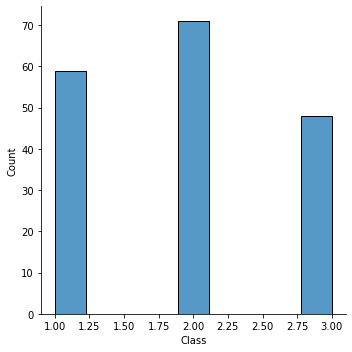

In [11]:
#let plot the distribution of our target (dependent) variable
sns.displot(data=df, x = "Class", kde= False)
#sns.color_palette("mako", as_cmap=True)


The variables, 'Ash' and 'Alcalinity of ash'are normally distribuited, but contains outlayers. For this reason I will apply Standardization for both variables. For the rest of variables that contain outlyers I will apply Robust Scaler.

In [12]:
['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

['Class',
 'Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

standColumns = ['Alcalinity of ash', 'Ash']
scalerStand = preprocessing.StandardScaler().fit(df[standColumns])
df[standColumns] = scalerStand.transform(df[standColumns])

normColumns = ['Alcohol', 'Total phenols','Flavanoids','Nonflavanoid phenols','OD280/OD315 of diluted wines','Proline']
scalerNorm = preprocessing.MinMaxScaler().fit(df[normColumns])
df[normColumns] = scalerNorm.transform(df[normColumns])

outColumns = ['Malic acid', 'Magnesium','Color intensity','Hue','Proanthocyanins']
scalerRob = preprocessing.RobustScaler().fit(df[outColumns])
df[outColumns] = scalerRob.transform(df[outColumns])

### Let visualize the nuew processed variables:

<Figure size 576x360 with 0 Axes>

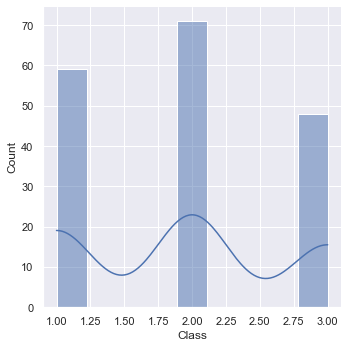

<Figure size 576x360 with 0 Axes>

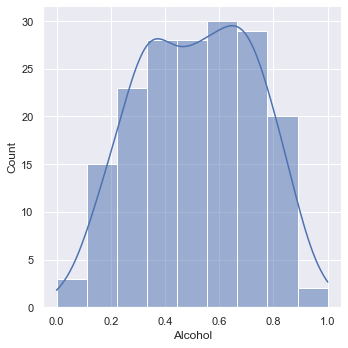

<Figure size 576x360 with 0 Axes>

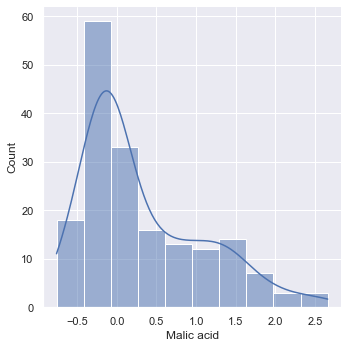

<Figure size 576x360 with 0 Axes>

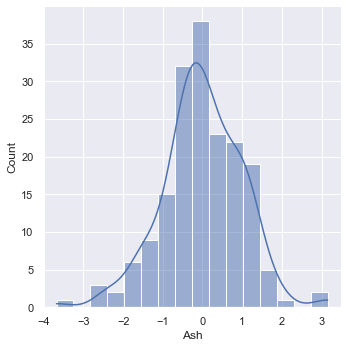

<Figure size 576x360 with 0 Axes>

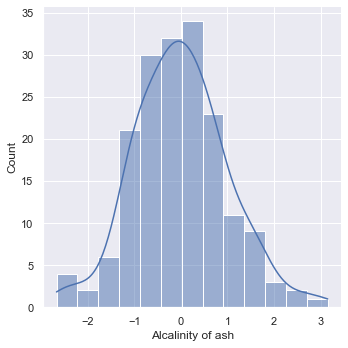

<Figure size 576x360 with 0 Axes>

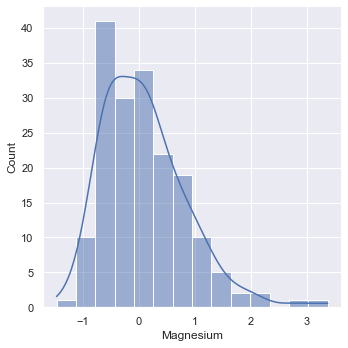

<Figure size 576x360 with 0 Axes>

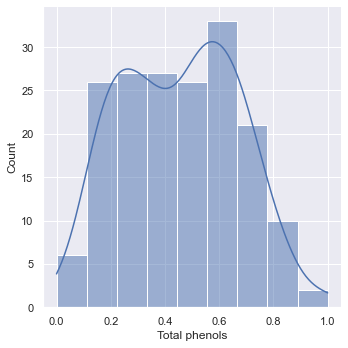

<Figure size 576x360 with 0 Axes>

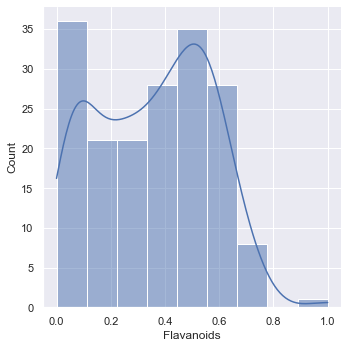

<Figure size 576x360 with 0 Axes>

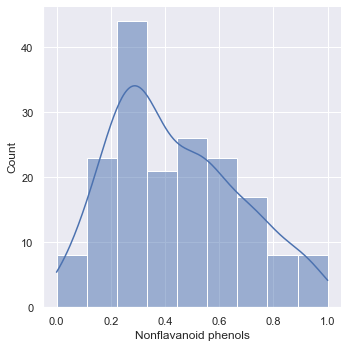

<Figure size 576x360 with 0 Axes>

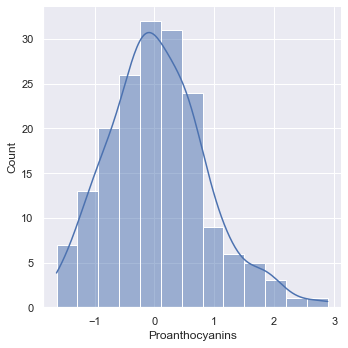

<Figure size 576x360 with 0 Axes>

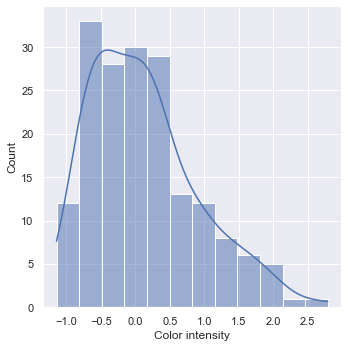

<Figure size 576x360 with 0 Axes>

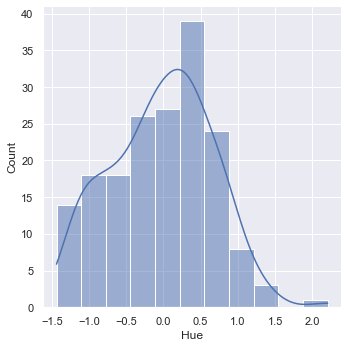

<Figure size 576x360 with 0 Axes>

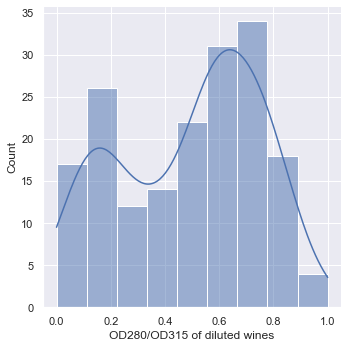

<Figure size 576x360 with 0 Axes>

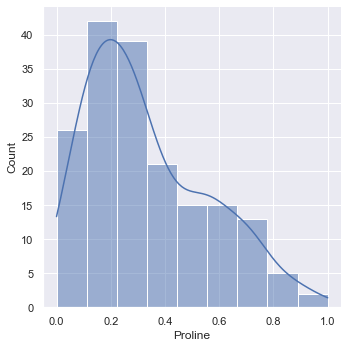

In [33]:
import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    sns.displot(data=df, x = df[i], kde= True)

## Train and test split

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
#split features and target
X = df.drop(['Class'],axis=1)
y = df['Class']

#split train and test of features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


# Models

### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier


# Create Decision Tree classifer object
dtc_classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc_classifier_train = dtc_classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc_classifier = dtc_classifier.predict(X_test)

In [38]:
y_pred_dtc_classifier[0:5]

array([1, 2, 2, 2, 2])

### KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNeighborsRegressor classifer object
KN_classifier = KNeighborsClassifier(n_neighbors=5)

# Train KNeighborsRegressor Classifer
KN_classifier_train = KN_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_KN_classifier = KN_classifier.predict(X_test)

In [40]:
y_pred_KN_classifier[0:5]

array([1, 2, 2, 2, 2])

## Evaluation

### Accuracy:

In [46]:
from sklearn import metrics
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test, y_pred_dtc_classifier))
dt_accuracy = metrics.accuracy_score(y_test, y_pred_dtc_classifier)

Accuracy Decision Tree: 0.9166666666666666


In [47]:
print("Accuracy KNN Regression:",metrics.accuracy_score(y_test, y_pred_KN_classifier))
KNN_accuracy = metrics.accuracy_score(y_test, y_pred_KN_classifier)

Accuracy KNN Regression: 0.9166666666666666


### Cross Validation

In [48]:
from sklearn import svm
from sklearn.model_selection import cross_val_score


In [49]:
cv_dt_scores = cross_val_score(dtc_classifier, X, y, cv=5,scoring='f1_macro')
print("Decision Tree Cross Validation Score: ", cv_dt_scores.mean())


Decision Tree Cross Validation Score:  0.8875613928039329


In [50]:
cv_KNN_scores = cross_val_score(KN_classifier, X, y, cv=5, scoring='f1_macro')
print("KNN Regression Cross Validation Score: ", cv_KNN_scores.mean())

KNN Regression Cross Validation Score:  0.8728709562042894


### Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred_dtc_classifier)
cf_matrix_KNN = confusion_matrix(y_test, y_pred_KN_classifier)


[Text(0.5, 1.0, 'Confusion matrix for Decision Tree')]

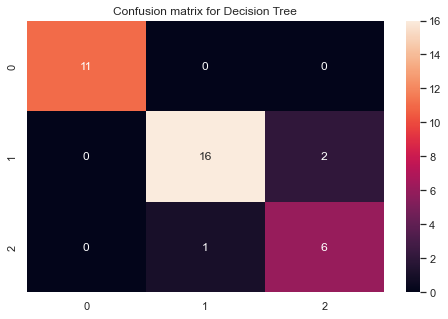

In [52]:
sns.heatmap(cf_matrix_dt, annot=True).set(title='Confusion matrix for Decision Tree')

[Text(0.5, 1.0, 'Confusion matrix for KNN Classifier')]

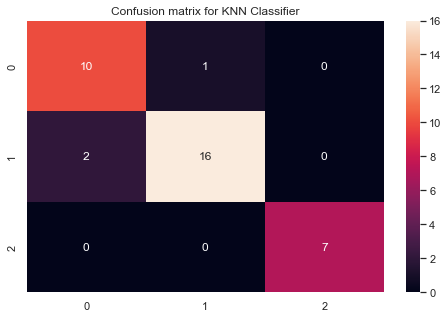

In [53]:
sns.heatmap(cf_matrix_KNN, annot=True).set(title='Confusion matrix for KNN Classifier')

In [54]:
metrics = pd.DataFrame( data = [['KNN Classifier', KNN_accuracy, cv_KNN_scores.mean(),cf_matrix_KNN],
                                ['Decision_Tree',dt_accuracy,cv_dt_scores.mean(),cf_matrix_dt]],
                                  columns = ['Model', 'Accuracy','CV', 'Confusion_matrix'])
metrics.head()

,Model,Accuracy,CV,Confusion_matrix
0,KNN Classifier,0.916667,0.872871,"[[10, 1, 0], [2, 16, 0], [0, 0, 7]]"
1,Decision_Tree,0.916667,0.887561,"[[11, 0, 0], [0, 16, 2], [0, 1, 6]]"


# Accuracy can be see by comparing actual test set values and predicted values.

We got an Accuracy rate of 91.66% from both models, considered that it is a quite good accuracy. Looking at the other metrics, I decided to move ahead, making some improvements on the Decisiont Tree model, since it performs slightly better than the KNN classifier model on Cross Validation. 

### Decision Tree Model improvment:

For the table above, we can see that Decision Tree seem to perform better than the KNN Classifier model. For that reason I secide to optimize the performance of the Decision Tree model by using Criterion. and Splitter.

Criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

Splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

In [61]:
from sklearn import metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("DT Accuracy with Criterion:",metrics.accuracy_score(y_test, y_pred))

# Cross validation
cv_dt_scores_clf = cross_val_score(clf, X, y, cv=5,scoring='f1_macro')
print("DT with Criterion Cross Validation Score: ", cv_dt_scores_clf.mean())

DT Accuracy with Criterion: 0.9722222222222222
DT with Criterion Cross Validation Score:  0.9133138117015651


In [62]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(splitter="random", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test)

# Model Accuracy
print("DT Accuracy with Splitter:",metrics.accuracy_score(y_test, y_pred2))

# Cross validation
cv_dt_scores_clf2 = cross_val_score(clf2, X, y, cv=5,scoring='f1_macro')
print("DT with Splitter Cross Validation Score: ", cv_dt_scores_clf2.mean())

DT Accuracy with Splitter: 0.9722222222222222
DT with Splitter Cross Validation Score:  0.8401696727863894


We can observe that the DT model performs slighth better with the implementation of Criterion parameter. (CV score).

### References:
https://www.datacamp.com/tutorial/decision-tree-classification-python

https://github.com/aina1997/MasterClassDS/blob/main/Introducci%C3%B3%20a%20la%20Intel%C2%B7lig%C3%A8ncia%20artificial/AI-Classification.ipynb

### Conclusions:

1. Presented the 2 different models we can observe that both works good but we can observe a slighth better performer with the Decision Tree Classifier model.
2. It's important to try two or more different improving parametres, to see wich one better perform.
3. Before apply engineering process to improve the results of the models it's iportant to study all variables and visualize them.